In [1]:
import pandas as pd
import numpy as np
import os

#Plots
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
full_path = os.getcwd()
df = pd.read_csv(full_path.partition('notebooks')[0] + '/data/04_feature/customer_features.csv')

In [3]:
df_copy = df.copy()

In [86]:
df.head()

,CustomerId,CreditType,CreditAmount,Duration_Months,NumberOfInstallmentsToPay,PaymentFrequency,HasDefault,run_date,Avg_Monthly_Income,Income_Stability,...,Previous_Loans_Std,Previous_Loan_Defaults,Active_Loans_Count,Active_Loan_Amount_Total,SegGroup,AMLRiskRating,YrNetMonthlyIn,Age,Is_Employed,Is_Married
0,61989,Credit Card,650000.0,36.0,0,Monthly,0,20230630,3.088140e+06,4.465342e+06,...,NaN,NaN,NaN,NaN,Personal,Elevado,1000000.00,64.0,1,1
1,75075,Credit Card,130000.0,36.0,0,Monthly,0,20230630,8.468346e+05,1.606619e+06,...,17320.508076,NaN,NaN,NaN,Personal,Baixo,0.00,47.0,0,1
2,79216,Credit Card,100000.0,36.0,0,Monthly,0,20230630,2.953333e+05,1.955130e+05,...,NaN,NaN,NaN,NaN,Personal,Baixo,224227.75,70.0,1,1
3,96717,Credit Card,750000.0,36.0,0,Monthly,0,20230630,9.513645e+05,6.054409e+05,...,0.000000,NaN,NaN,NaN,Personal,Baixo,6000000.00,46.0,1,1
4,96717,Credit Card,750000.0,36.0,0,Monthly,0,20230630,9.513645e+05,6.054409e+05,...,0.000000,NaN,NaN,NaN,Personal,Baixo,6000000.00,46.0,1,1


In [4]:
df.shape

(9949, 26)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9949 entries, 0 to 9948
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerId                 9949 non-null   int64  
 1   CreditType                 9949 non-null   object 
 2   CreditAmount               9949 non-null   float64
 3   Duration_Months            9949 non-null   float64
 4   NumberOfInstallmentsToPay  9949 non-null   int64  
 5   PaymentFrequency           9949 non-null   object 
 6   HasDefault                 9949 non-null   int64  
 7   run_date                   9949 non-null   int64  
 8   Avg_Monthly_Income         9949 non-null   float64
 9   Income_Stability           9949 non-null   float64
 10  Avg_Monthly_expenses       9949 non-null   float64
 11  Expenses_Stability         9949 non-null   float64
 12  Avg_Monthly_Funds          9949 non-null   float64
 13  Funds_Stability            9949 non-null   float

In [88]:
df.duplicated().sum()

109

In [89]:
df[df.duplicated(keep=False)].sort_values(by='CustomerId')

,CustomerId,CreditType,CreditAmount,Duration_Months,NumberOfInstallmentsToPay,PaymentFrequency,HasDefault,run_date,Avg_Monthly_Income,Income_Stability,...,Previous_Loans_Std,Previous_Loan_Defaults,Active_Loans_Count,Active_Loan_Amount_Total,SegGroup,AMLRiskRating,YrNetMonthlyIn,Age,Is_Employed,Is_Married
312,397,Credit Card,200000.0,36.0,0,Monthly,0,20230630,299008.860,62308.184504,...,NaN,NaN,NaN,NaN,Personal,Elevado,0.0,62.0,1,1
313,397,Credit Card,200000.0,36.0,0,Monthly,0,20230630,299008.860,62308.184504,...,NaN,NaN,NaN,NaN,Personal,Elevado,0.0,62.0,1,1
2475,2125,Credit Card,100000.0,36.0,0,Monthly,0,20230630,NaN,NaN,...,100000.0,NaN,NaN,NaN,Company,Elevado,0.0,6.0,0,0
2473,2125,Credit Card,100000.0,36.0,0,Monthly,0,20230630,NaN,NaN,...,100000.0,NaN,NaN,NaN,Company,Elevado,0.0,6.0,0,0
2474,2125,Credit Card,100000.0,36.0,0,Monthly,0,20230630,NaN,NaN,...,100000.0,NaN,NaN,NaN,Company,Elevado,0.0,6.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,120018,Credit Card,195000.0,36.0,0,Monthly,0,20230630,719000.276,704085.579258,...,NaN,NaN,NaN,NaN,Personal,Baixo,100000.0,51.0,1,1
1375,120018,Credit Card,195000.0,36.0,0,Monthly,0,20230630,719000.276,704085.579258,...,NaN,NaN,NaN,NaN,Personal,Baixo,100000.0,51.0,1,1
1916,121212,Credit Card,100000.0,36.0,0,Monthly,0,20230630,850679.334,621782.822850,...,0.0,NaN,NaN,NaN,Personal,Baixo,700000.0,32.0,1,1
1917,121212,Credit Card,100000.0,36.0,0,Monthly,0,20230630,850679.334,621782.822850,...,0.0,NaN,NaN,NaN,Personal,Baixo,700000.0,32.0,1,1


In [5]:
df= df.drop_duplicates()

In [91]:
df.describe()

,CustomerId,CreditAmount,Duration_Months,NumberOfInstallmentsToPay,HasDefault,run_date,Avg_Monthly_Income,Income_Stability,Avg_Monthly_expenses,Expenses_Stability,...,Previous_Loan_Count,Previous_Loans_Avg_Amount,Previous_Loans_Std,Previous_Loan_Defaults,Active_Loans_Count,Active_Loan_Amount_Total,YrNetMonthlyIn,Age,Is_Employed,Is_Married
count,9840.000000,9.840000e+03,4433.000000,9840.000000,9840.000000,9.840000e+03,8.911000e+03,8.286000e+03,8.825000e+03,8.400000e+03,...,5762.000000,5.762000e+03,1.834000e+03,818.000000,1175.000000,1.175000e+03,9.840000e+03,9839.000000,9840.000000,9840.000000
mean,61797.293496,6.893382e+05,32.102639,4.454472,0.255488,2.023551e+07,1.909357e+06,9.646714e+05,1.809051e+06,9.640534e+05,...,1.859077,1.210738e+06,1.790563e+06,4.045232,1.584681,2.643575e+06,6.005268e+04,36.130603,0.738923,0.194614
std,35255.637753,1.254678e+07,17.531008,16.008661,0.436157,4.885070e+03,1.631760e+07,6.112914e+06,1.442396e+07,8.718283e+06,...,3.573795,1.611732e+07,7.051035e+06,4.001733,2.144547,1.948574e+07,4.521688e+05,14.018535,0.439244,0.395923
min,152.000000,0.000000e+00,1.000000,0.000000,0.000000,2.023063e+07,1.000000e+00,0.000000e+00,2.000000e-02,0.000000e+00,...,1.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,31158.750000,3.121350e+02,15.000000,0.000000,0.000000,2.023063e+07,1.333477e+04,6.159967e+03,1.298361e+04,7.574101e+03,...,1.000000,4.200000e+03,2.828427e+04,2.000000,1.000000,7.209020e+03,0.000000e+00,28.000000,0.000000,0.000000
50%,62417.000000,2.000000e+03,36.000000,0.000000,0.000000,2.023073e+07,4.271959e+04,2.657324e+04,4.168366e+04,3.196772e+04,...,1.000000,6.149845e+04,1.154701e+05,3.000000,1.000000,6.833593e+04,1.200000e+04,36.000000,1.000000,0.000000
75%,91953.750000,9.800000e+04,36.000000,0.000000,1.000000,2.024053e+07,1.967342e+05,1.314952e+05,1.868118e+05,1.369099e+05,...,2.000000,2.143462e+05,5.617765e+05,5.000000,1.000000,2.852395e+05,4.332500e+04,44.000000,1.000000,0.000000
max,122202.000000,6.391000e+08,321.000000,326.000000,1.000000,2.024053e+07,6.962484e+08,1.489723e+08,5.825882e+08,5.639684e+08,...,79.000000,6.400000e+08,1.217850e+08,32.000000,29.000000,5.316899e+08,2.344245e+07,255.000000,1.000000,1.000000


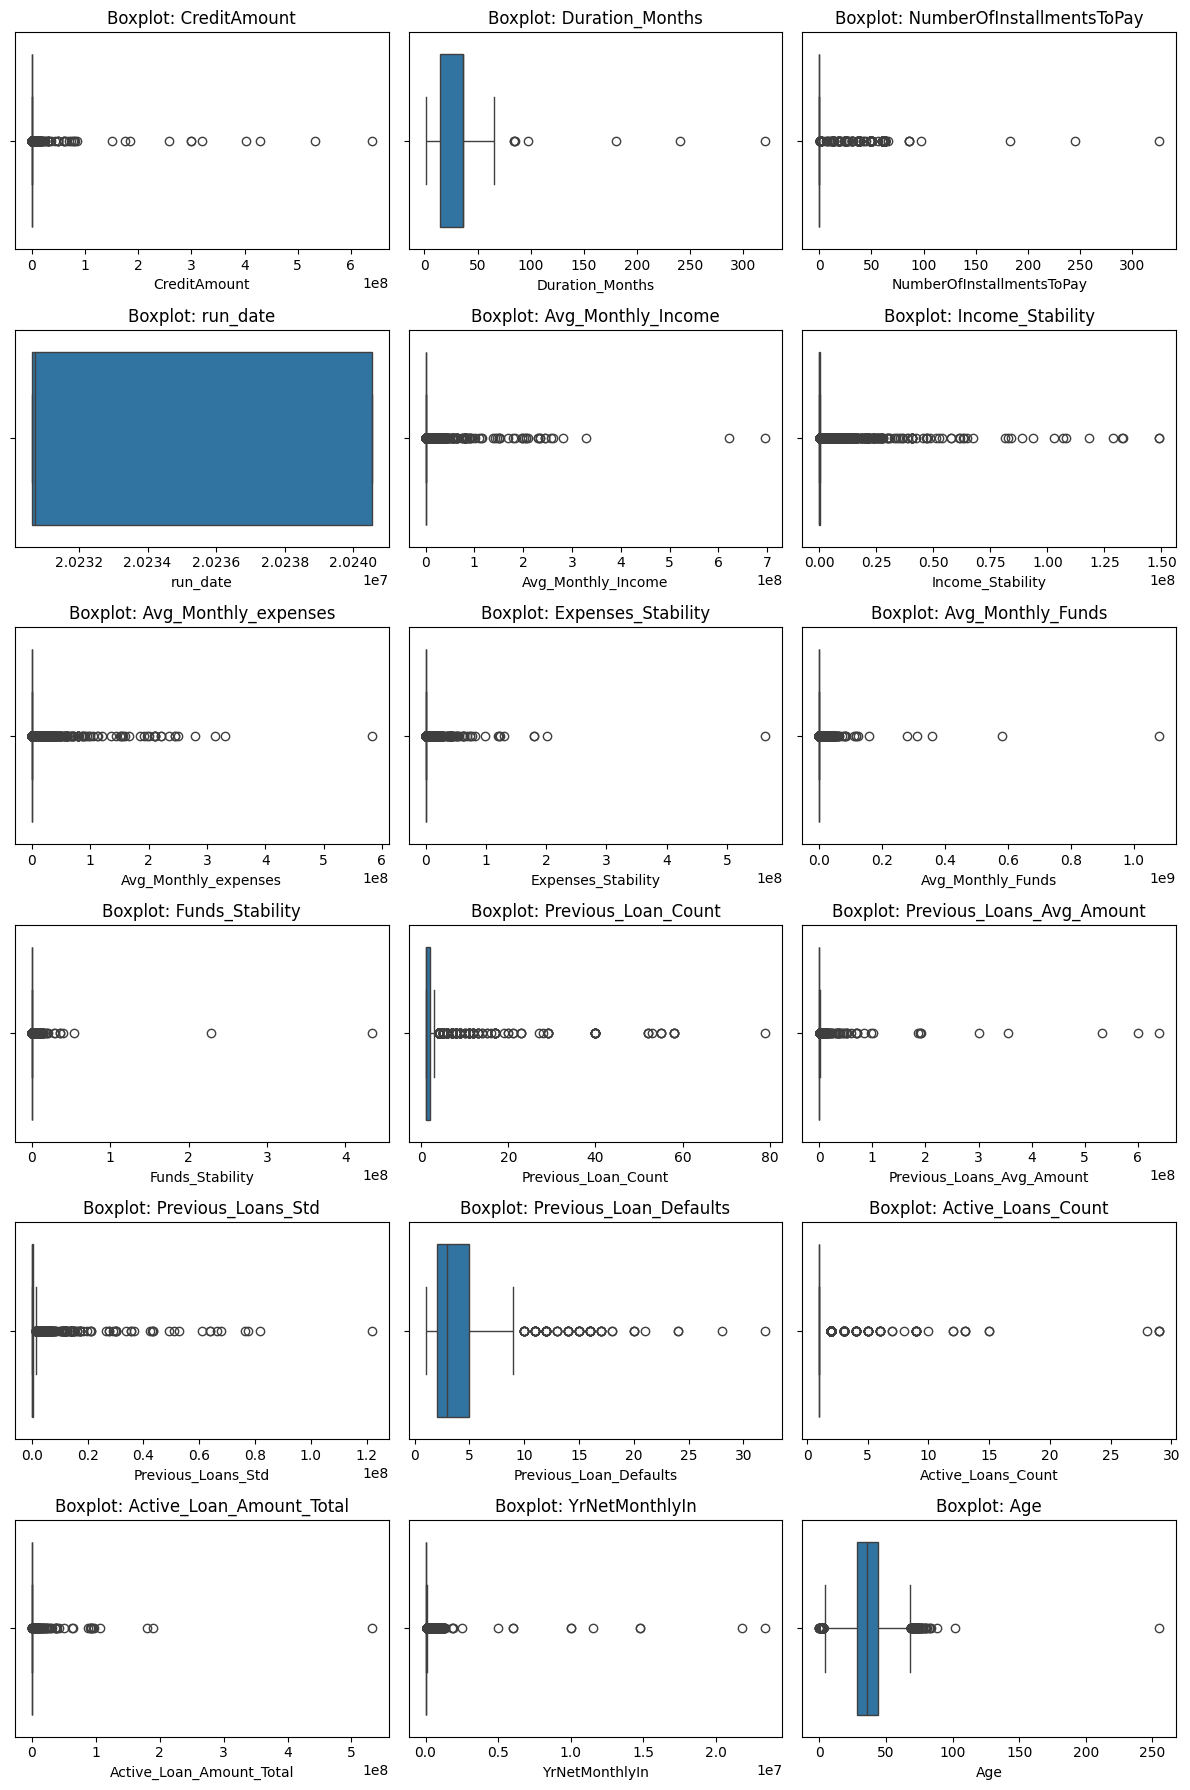

In [92]:
# Select only the numeric columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop(['CustomerId','Is_Married', 'Is_Employed', 'HasDefault'])

# Set the number of columns for the layout (2 per row)
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))  # Calculate the number of rows

# Create a figure with subplots
plt.figure(figsize=(12, 3 * n_rows))

# Create the boxplots
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.boxplot(data=df[col], orient='h')  # Set the boxplots to be horizontal
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()

# Show the plot
plt.show()


In [67]:
accounts_invalid_age = df[(df['Age'] < 10) | (df['Age'] > 100)]

# Display the number of accounts with invalid age
num_accounts_invalid_age = accounts_invalid_age.shape[0]
print(f"Number of accounts with invalid age: {num_accounts_invalid_age}")

Number of accounts with invalid age: 551


In [6]:
import pandas as pd

limits = {
    'CreditAmount': 6e8,
    'NumberOfInstallmentsToPay': 150,
    'Avg_Monthly_Income': 4e8,
    'Avg_Monthly_expenses':4e8,
    'Age': 100,
    'Expenses_Stability':1.5e8,
    'Avg_Monthly_Funds': 2.5e8,
    'Funds_Stability': 5e7,
    'Previous_Loan_Count': 60,
    'Previous_Loans_Avg_Amount':3e8,
    'Previous_Loans_Std': 1e8,
    'Active_Loans_Count':20,
    'Active_Loan_Amount_Total': 1.5e8,
    'YrNetMonthlyIn':1.5e7    
    
}

original_row_count = len(df)

for column, upper_limit in limits.items():
    df = df[df[column] <= upper_limit]

df = df[df['Age'] > 0] 
filtered_row_count = len(df)

removed_rows = original_row_count - filtered_row_count

print(f"Linhas removidas: {removed_rows}")


Linhas removidas: 33


In [7]:
df.shape

(9807, 26)

In [8]:
(df_copy.shape[0] - df.shape[0])/df_copy.shape[0]

0.01427279123530003

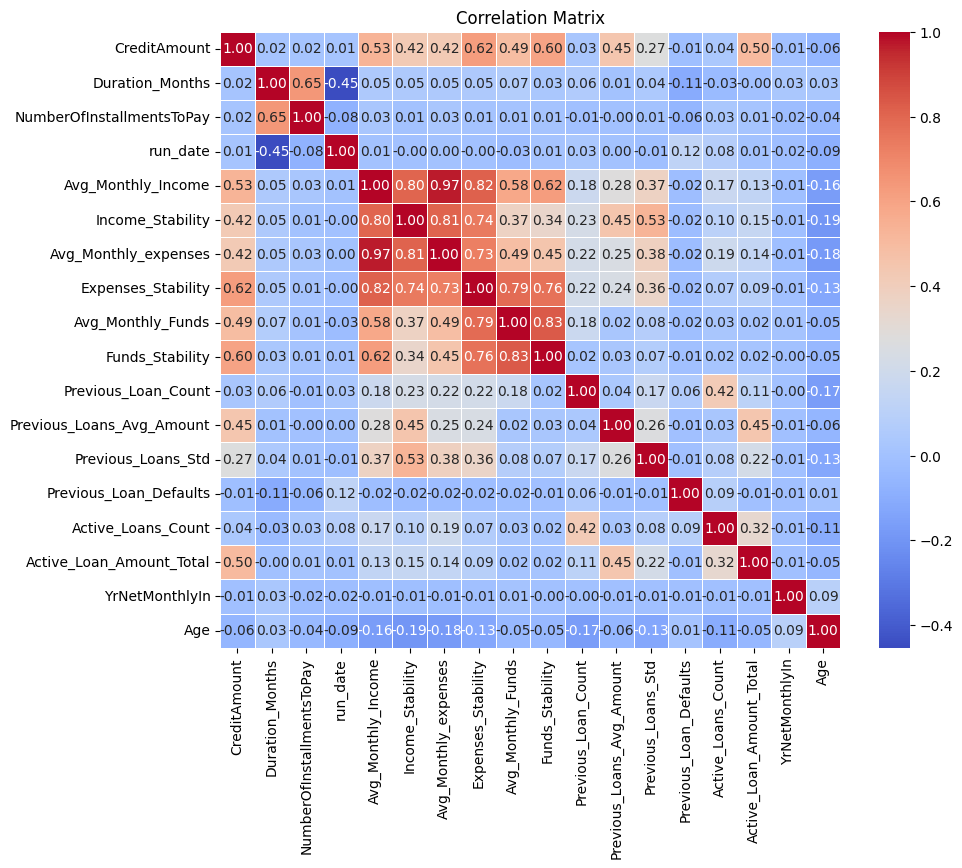

In [19]:
# Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Target Variable

<Axes: xlabel='HasDefault'>

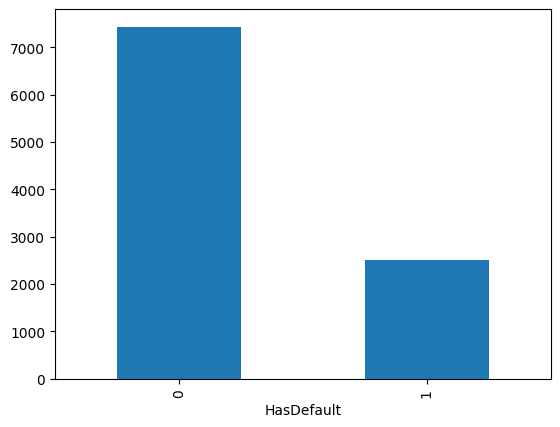

In [16]:
df['HasDefault'].value_counts().plot(kind='bar')

Our target variable is very imbalanced